# Türkiye için Küresel Enerji Değerlendirmesi

## Bölüm 3 - G1.4 - 1.4 milyar nüfuslu bölgeler - Balinalar


Barış Sanlı, barissanli2@gmail.com

Enerji verileri için https://www.energyinst.org/statistical-review/resources-and-data-downloads (Narrow - CSV Format) indirin

In [1]:
#!pip install plotnine         # 1. should be sufficient for most
#!pip install 'plotnine[all]'

In [2]:
# font sorunları için
# rebuild font cache https://stackoverflow.com/questions/37920935/matplotlib-cant-find-font-installed-in-my-linux-machine/70647041#70647041
# font install https://techoverflow.net/2024/01/29/how-to-fix-matplotlib-findfont-font-family-xkcd-not-found-on-ubuntu-22-04/
# brew install font-xkbcd

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
#warnings.filterwarnings(action='once')
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
from plotnine import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd


In [4]:
import pandas as pd

In [5]:
#%matplotlib inline

-------------deneme bölgesi--------------

In [6]:
df=pd.read_csv("merged_narrow.csv")
df.drop(columns=['Region', 'SubRegion',"OPEC","EU","OECD","CIS","ISO3166_alpha3","ISO3166_numeric"], inplace=True)

In [7]:
ulkeler=["Turkiye","Total World","Total OECD","China","India","Total EU","US","Total Africa","Total CIS","Total Middle East"]
ortalar=["Vietnam","Thailand", "Indonesia", "Brazil", "Pakistan", "Philippines", "Bangladesh", "Iran", "Russian Federation"]
ulkeler=ulkeler+ortalar
tumulkeler=ulkeler+["Orta","Dünya-Çin","Diğer"]
ilkyil=1995

In [8]:
df.Var.unique()

array(['biodiesel_cons_kboed', 'biodiesel_cons_pj',
       'biodiesel_prod_kboed', 'biodiesel_prod_pj', 'biofuels_cons_ej',
       'biofuels_cons_kbd', 'biofuels_cons_kboed', 'biofuels_cons_pj',
       'biofuels_prod_kbd', 'biofuels_prod_kboed', 'biofuels_prod_pj',
       'biogeo_ej', 'biogeo_twh', 'biogeo_twh_net', 'co2_combust_mtco2',
       'co2_combust_pc', 'co2_combust_per_ej', 'co2_mtco2', 'coalcons_ej',
       'coalprod_ej', 'coalprod_mt', 'cobalt_kt', 'cobaltres_kt',
       'diesel_gasoil_cons_kbd', 'elect_twh', 'electbyfuel_coal',
       'electbyfuel_gas', 'electbyfuel_hydro', 'electbyfuel_nuclear',
       'electbyfuel_oil', 'electbyfuel_other', 'electbyfuel_ren_power',
       'electbyfuel_total', 'ethanol_cons_kboed', 'ethanol_cons_pj',
       'ethanol_prod_kboed', 'ethanol_prod_pj', 'fuel_oil_cons_kbd',
       'gascons_bcfd', 'gascons_bcm', 'gascons_ej', 'gasflared_bcm',
       'gasflared_mtco2', 'gasoline_cons_kbd', 'gasprod_bcfd',
       'gasprod_bcm', 'gasprod_ej', 'graph

In [9]:
degiskenler=[ 'GDP', 'pop',
       'primary_eintensity', 'primary_ej', 'primary_ej_pc',
       'elect_twh']

In [10]:
ds=df[df.Country.isin(ulkeler) & (df.Year>ilkyil) & df.Var.isin(degiskenler)]

In [11]:
dt=ds.pivot_table(index="Year",columns=["Country","Var"],values="Value")

In [12]:
dt[ortalar].groupby(level=1, axis=1).sum()

Var,elect_twh,pop,primary_eintensity,primary_ej,primary_ej_pc
Year,,,,,
1996,1506.717930,1041.288161,43.420423,47.487541,385.340900
1997,1535.715083,1057.574600,43.067744,47.183981,383.089821
1998,1560.061358,1074.076985,44.688732,47.499427,381.977059
1999,1609.968494,1090.425687,44.723177,48.848215,392.068661
2000,1686.237619,1106.802942,43.551231,50.451729,402.672404
2001,1715.781770,1123.109666,43.717506,51.625229,412.178925
2002,1769.251617,1137.971763,43.046004,52.705644,423.425825
2003,1851.790045,1151.186324,42.280208,54.439546,435.594086
2004,1935.587520,1165.744186,42.137130,56.477324,454.788889


In [13]:
for i in ulkeler:
      dt[i,"GDP"] = dt[i,"primary_ej"]/ dt[i,"primary_eintensity"]

In [14]:
for i in degiskenler:
  dt['Orta', i] = dt[ortalar].groupby(level=1, axis=1).sum()[i]
#df = df.sort_index(axis=1)

In [15]:
for i in degiskenler:
  dt['Dünya-Çin', i] = dt["Total World",i]-dt["China",i]
  dt['Diğer', i] = dt["Total World",i]-dt["China",i]-dt["India",i]-dt["Total Africa",i]-dt["Total OECD",i]-dt["Orta",i]
#df = df.sort_index(axis=1)
#df = df.sort_index(axis=1)

In [16]:
for i in ortalar:
    dt[i]["pop"]

In [17]:
plt.rcdefaults()
plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-whitegrid')

#plt.xkcd()

#plt.figure(figsize=(12,6))
matplotlib.rcParams['figure.figsize'] = (10, 6)
plt.xkcd()

# Orta Güçler

In [18]:
trortalar=["Vietnam", "Tayland", "Endonezya", "Brezilya", "Pakistan", "Filipinler", "Bangladeş", "İran", "Rusya"]

In [19]:
trisim={ ortalar[i] : trortalar[i] for i in range(len(ortalar))}

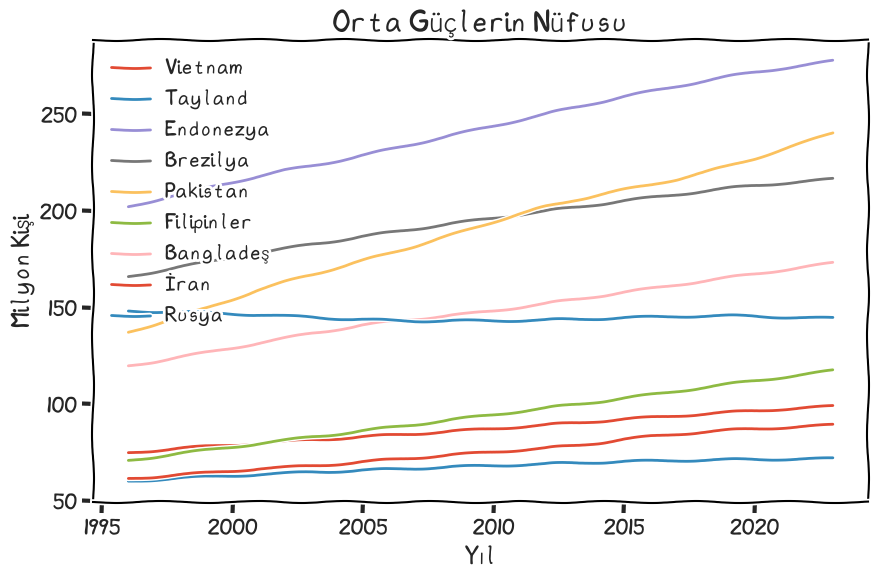

In [20]:

for i in ortalar:
    plt.plot(dt[i]["pop"],label=trisim[i])
t=1
plt.title("Orta Güçlerin Nüfusu")
plt.xlabel("Yıl")
plt.ylabel("Milyon Kişi")
plt.legend()

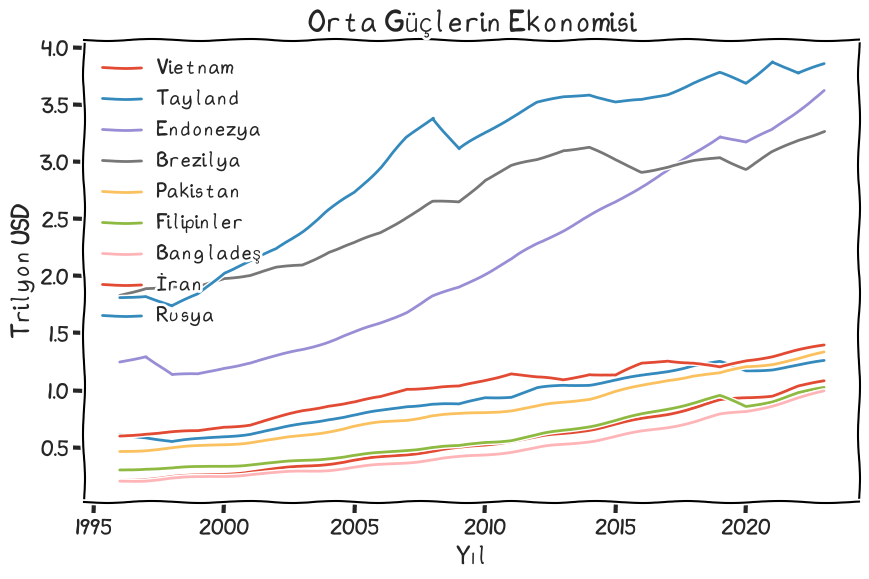

In [21]:

for i in ortalar:
    plt.plot(dt[i]["GDP"],label=trisim[i])
t=1
plt.title("Orta Güçlerin Ekonomisi")
plt.xlabel("Yıl")
plt.ylabel("Trilyon USD")
plt.legend()

# Nüfus

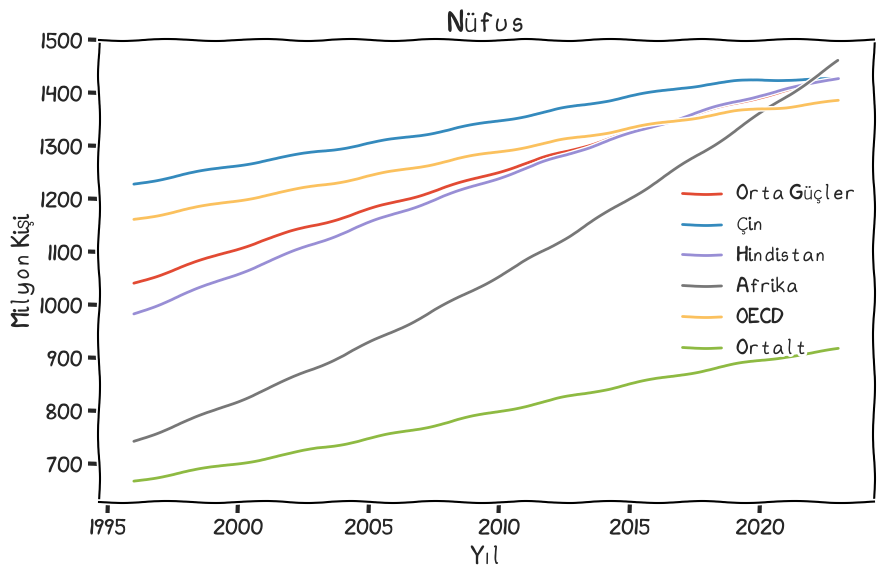

In [22]:
t=1
plt.plot(dt["Orta",degiskenler[t]],label="Orta Güçler")
plt.plot(dt["China",degiskenler[t]],label="Çin")
plt.plot(dt["India",degiskenler[t]],label="Hindistan")
plt.plot(dt["Total Africa",degiskenler[t]],label="Afrika")
plt.plot(dt["Total OECD",degiskenler[t]],label="OECD")
plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Nüfus")
plt.xlabel("Yıl")
plt.ylabel("Milyon Kişi")
plt.legend()

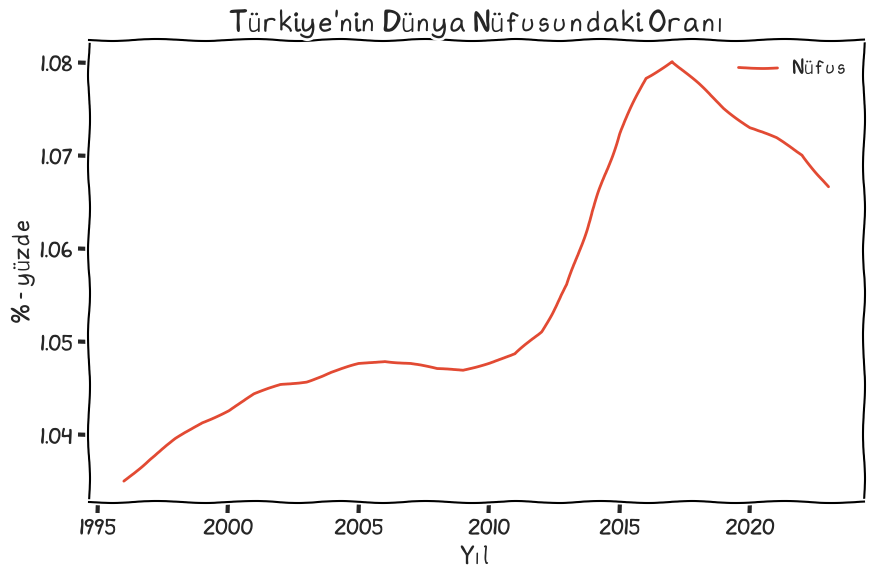

In [23]:
t=1
tr=dt[('Turkiye',degiskenler[t])]
plt.plot(100*tr/dt["Total World",degiskenler[t]],label="Nüfus")
plt.title("Türkiye'nin Dünya Nüfusundaki Oranı")
plt.xlabel("Yıl")
plt.ylabel("% - yüzde")
plt.legend()

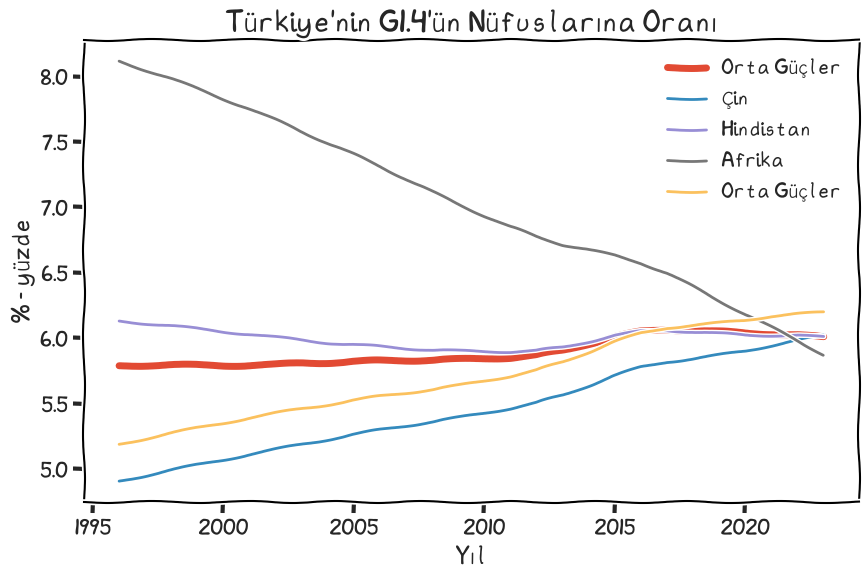

In [24]:
t=1
tr=dt[('Turkiye',degiskenler[t])]
plt.plot(100*tr/dt["Orta",degiskenler[t]],label="Orta Güçler",linewidth=5.0)
plt.plot(100*tr/dt["China",degiskenler[t]],label="Çin")
plt.plot(100*tr/dt["India",degiskenler[t]],label="Hindistan")
plt.plot(100*tr/dt["Total Africa",degiskenler[t]],label="Afrika")
plt.plot(100*tr/dt["Total OECD",degiskenler[t]],label="Orta Güçler")
#plt.plot(100*tr/dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye'nin G1.4'ün Nüfuslarına Oranı")
plt.xlabel("Yıl")
plt.ylabel("% - yüzde")
plt.legend()

# Enerji

Text(0, 0.5, '% - yüzde')

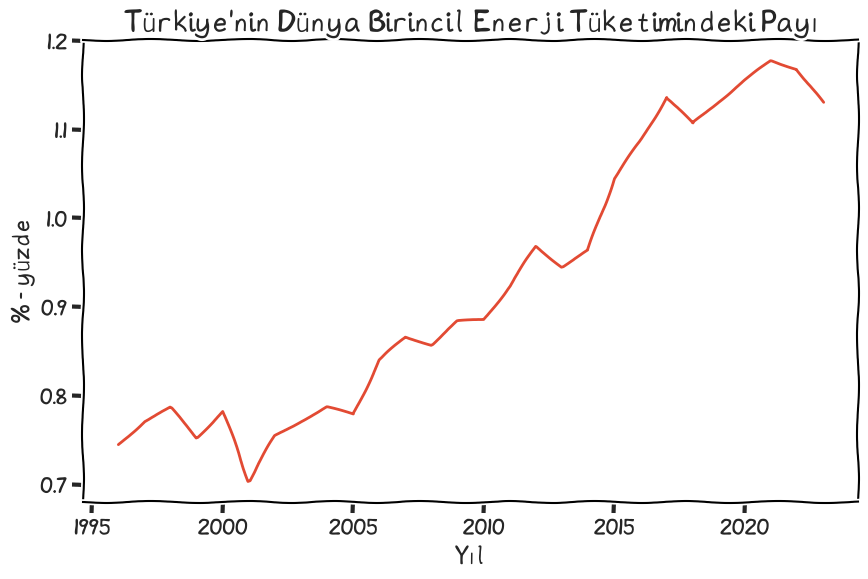

In [25]:
t=3
tr=dt[('Turkiye',degiskenler[t])]
plt.plot(100*tr/dt["Total World",degiskenler[t]],label="Nüfus")
plt.title("Türkiye'nin Dünya Birincil Enerji Tüketimindeki Payı")
plt.xlabel("Yıl")
plt.ylabel("% - yüzde")
#plt.legend()

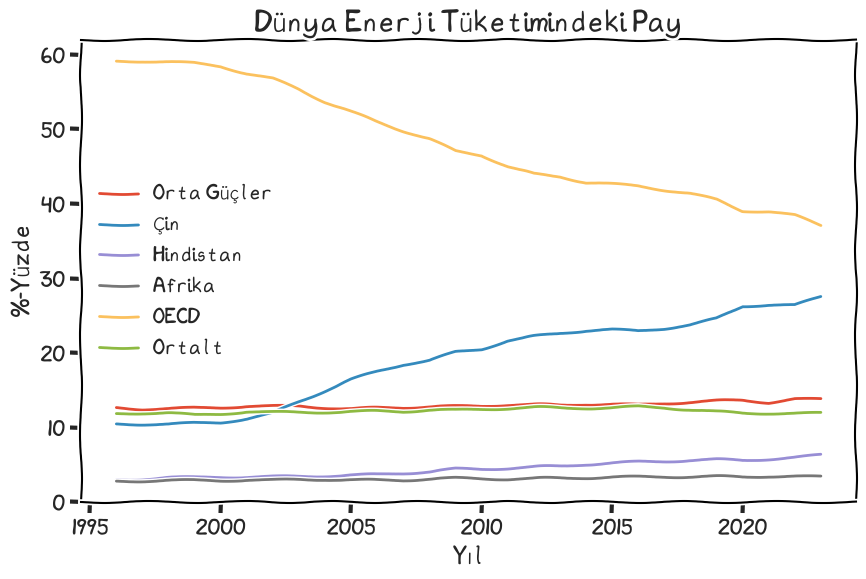

In [26]:
t=3
w=dt[('Total World',degiskenler[t])]

plt.plot(100*dt["Orta",degiskenler[t]]/w,label="Orta Güçler")
plt.plot(100*dt["China",degiskenler[t]]/w,label="Çin")
plt.plot(100*dt["India",degiskenler[t]]/w,label="Hindistan")
plt.plot(100*dt["Total Africa",degiskenler[t]]/w,label="Afrika")
plt.plot(100*dt["Total OECD",degiskenler[t]]/w,label="OECD")
plt.plot(100*dt["Diğer",degiskenler[t]]/w,label="Ortalt")

plt.title("Dünya Enerji Tüketimindeki Pay")
plt.xlabel("Yıl")
plt.ylabel("%-Yüzde")
plt.legend()

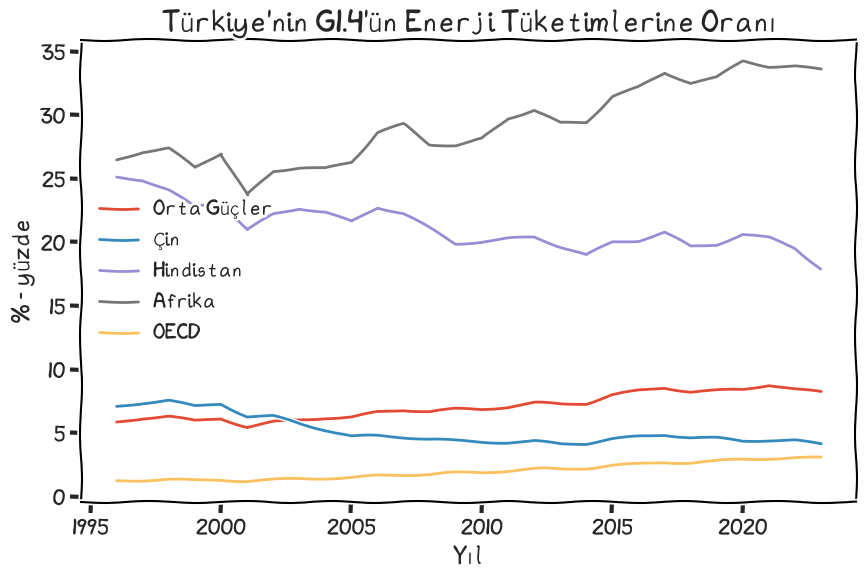

In [27]:
t=3
tr=dt[('Turkiye',degiskenler[t])]
plt.plot(100*tr/dt["Orta",degiskenler[t]],label="Orta Güçler")
plt.plot(100*tr/dt["China",degiskenler[t]],label="Çin")
plt.plot(100*tr/dt["India",degiskenler[t]],label="Hindistan")
plt.plot(100*tr/dt["Total Africa",degiskenler[t]],label="Afrika")
plt.plot(100*tr/dt["Total OECD",degiskenler[t]],label="OECD")
#plt.plot(100*tr/dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye'nin G1.4'ün Enerji Tüketimlerine Oranı")
plt.xlabel("Yıl")
plt.ylabel("% - yüzde")
plt.legend()

In [28]:
kiyaslar=["Orta","China","India","Total Africa","Total OECD"]

for i in kiyaslar:
  print(i, (100*tr/dt[(i,degiskenler[t])]).values[-1])

Orta 8.211995313156171
China 4.101621243913341
India 17.9491132626436
Total Africa 33.55659783592604
Total OECD 3.0461844436660104


# Enerji

Text(0, 0.5, '% - yüzde')

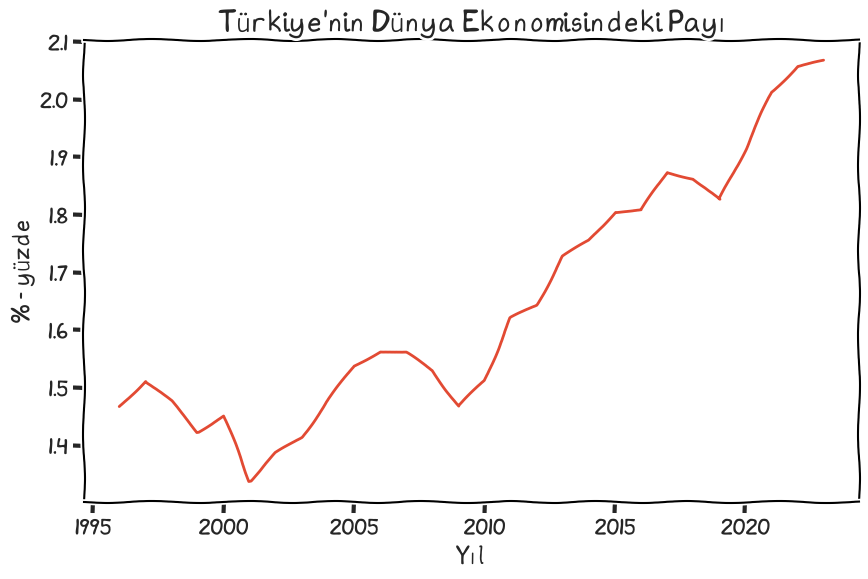

In [29]:
t=0
tr=dt[('Turkiye',degiskenler[t])]
plt.plot(100*tr/dt["Total World",degiskenler[t]],label="Nüfus")
plt.title("Türkiye'nin Dünya Ekonomisindeki Payı")
plt.xlabel("Yıl")
plt.ylabel("% - yüzde")
#plt.legend()

# Elektrik

elect_twh


Text(0, 0.5, '% - yüzde')

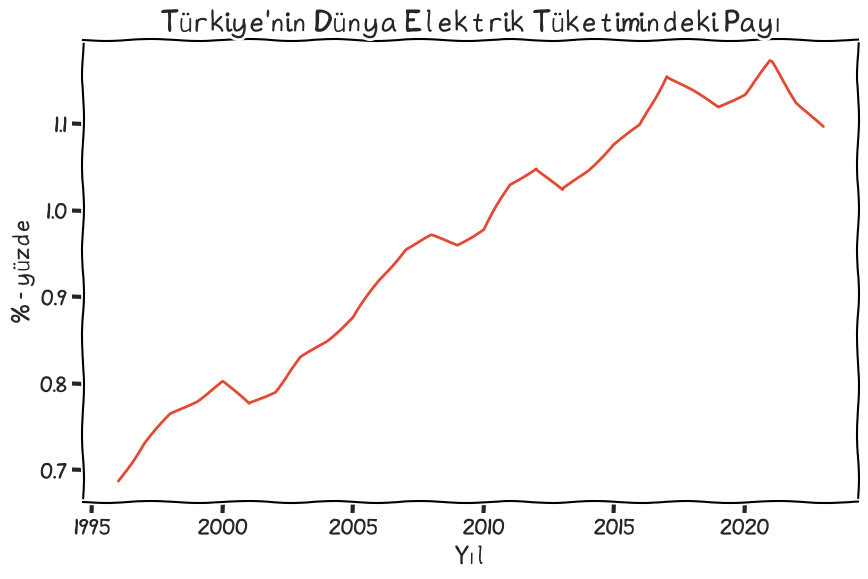

In [30]:
t=5
print (degiskenler[t])
tr=dt[('Turkiye',degiskenler[t])]
plt.plot(100*tr/dt["Total World",degiskenler[t]],label="Nüfus")
plt.title("Türkiye'nin Dünya Elektrik Tüketimindeki Payı")
plt.xlabel("Yıl")
plt.ylabel("% - yüzde")
#plt.legend()

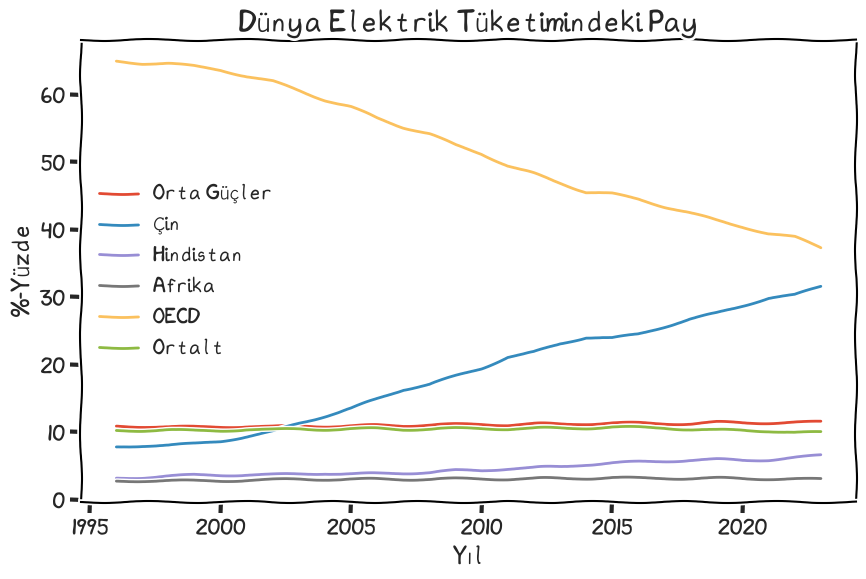

In [31]:
t=5
w=dt[('Total World',degiskenler[t])]

plt.plot(100*dt["Orta",degiskenler[t]]/w,label="Orta Güçler")
plt.plot(100*dt["China",degiskenler[t]]/w,label="Çin")
plt.plot(100*dt["India",degiskenler[t]]/w,label="Hindistan")
plt.plot(100*dt["Total Africa",degiskenler[t]]/w,label="Afrika")
plt.plot(100*dt["Total OECD",degiskenler[t]]/w,label="OECD")
plt.plot(100*dt["Diğer",degiskenler[t]]/w,label="Ortalt")

plt.title("Dünya Elektrik Tüketimindeki Pay")
plt.xlabel("Yıl")
plt.ylabel("%-Yüzde")
plt.legend()

In [32]:
kiyaslar=["Orta","China","India","Total Africa","Total OECD","Diğer"]

for i in kiyaslar:
  print(i, (100*dt[(i,degiskenler[t])]/w).values[-1])

Orta 11.509685307342117
China 31.600729533593753
India 6.5438898047375575
Total Africa 3.0173234106294946
Total OECD 37.35569889688556
Diğer 9.972673046811524


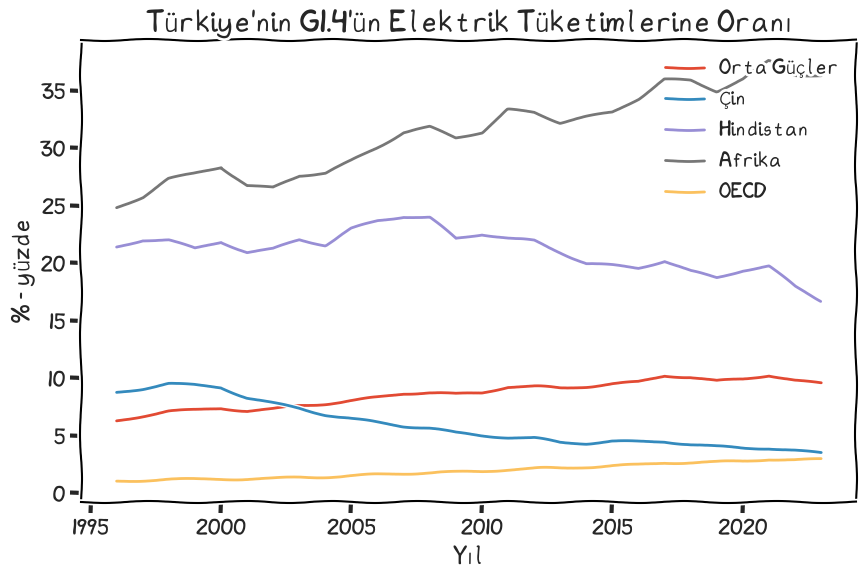

In [33]:
t=5
tr=dt[('Turkiye',degiskenler[t])]
plt.plot(100*tr/dt["Orta",degiskenler[t]],label="Orta Güçler")
plt.plot(100*tr/dt["China",degiskenler[t]],label="Çin")
plt.plot(100*tr/dt["India",degiskenler[t]],label="Hindistan")
plt.plot(100*tr/dt["Total Africa",degiskenler[t]],label="Afrika")
plt.plot(100*tr/dt["Total OECD",degiskenler[t]],label="OECD")
#plt.plot(100*tr/dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye'nin G1.4'ün Elektrik Tüketimlerine Oranı")
plt.xlabel("Yıl")
plt.ylabel("% - yüzde")
plt.legend()

In [34]:
kiyaslar=["Orta","China","India","Total Africa","Total OECD","Diğer"]

for i in kiyaslar:
  print(i, (100*tr/dt[(i,degiskenler[t])]).values[-1])

Orta 9.52452107153921
China 3.469041438427146
India 16.752152543461378
Total Africa 36.331617568862036
Total OECD 2.9346055213467013
Diğer 10.992463076047045


In [35]:
t=1 #nüfusu da kıyaslayalım
kiyaslar=["Orta","China","India","Total Africa","Total OECD","Diğer"]

for i in kiyaslar:
  print(i, (100*dt[('Turkiye',degiskenler[t])]/dt[(i,degiskenler[t])]).values[-1])

Orta 6.005284977221047
China 6.019353540324207
India 6.006897473887148
Total Africa 5.8758829246626725
Total OECD 6.196930367741326
Diğer 9.363202242917733


In [36]:
degiskenler

['GDP',
 'pop',
 'primary_eintensity',
 'primary_ej',
 'primary_ej_pc',
 'elect_twh']

In [37]:
import numpy as np

In [38]:
iterables = [ tumulkeler, ['pop'] ]
multi=pd.MultiIndex.from_product(iterables, names= ["Country", "Var"])
dt[multi]

Country,Turkiye,Total World,Total OECD,China,India,Total EU,US,Total Africa,Total CIS,Total Middle East,...,Indonesia,Brazil,Pakistan,Philippines,Bangladesh,Iran,Russian Federation,Orta,Dünya-Çin,Diğer
Var,pop,pop,pop,pop,pop,pop,pop,pop,pop,pop,...,pop,pop,pop,pop,pop,pop,pop,pop,pop,pop
Year,,,,,,,,,,,,,,,,,,,,,
1996,60.293786,5824.972995,1161.735159,1228.298836,983.281218,424.405440,268.984347,742.764746,228.961517,158.608641,...,202.205059,166.037122,137.234810,70.944969,119.876868,61.598378,148.233411,1041.288161,4596.674159,667.604875
1997,61.277426,5906.308420,1170.940873,1237.801448,1002.335230,424.961247,272.395438,761.224446,228.923013,162.350474,...,205.471348,168.546707,141.330267,72.718837,122.039226,62.480532,147.939972,1057.574600,4668.506972,676.431823
1998,62.242204,5987.139157,1180.016245,1246.836105,1021.434576,425.461499,275.835018,779.908030,228.795137,166.213656,...,208.710896,171.039804,145.476106,74.491918,124.350471,63.461421,147.672728,1074.076985,4740.303052,684.867216
1999,63.185615,6067.584544,1188.854774,1255.433236,1040.500054,425.928519,279.181581,799.099339,228.684608,170.153286,...,211.863559,173.486281,149.694462,76.249064,126.754824,64.474744,147.336388,1090.425687,4812.151308,693.271454
2000,64.113547,6148.724054,1197.799522,1264.099069,1059.633675,426.635025,282.398554,818.952055,228.650872,174.202579,...,214.950782,175.873720,154.369924,77.958223,129.193327,65.544383,146.844839,1106.802942,4884.624985,701.436791
2001,65.072018,6230.570553,1206.771423,1272.739582,1078.970907,427.424681,285.470493,839.463865,228.607474,178.308032,...,218.005438,178.211881,159.217727,79.626086,131.670484,66.674851,146.235530,1123.109666,4957.830971,709.515110
2002,65.988663,6312.229035,1215.591055,1280.926120,1098.313038,428.378357,288.350252,860.611462,228.535688,181.965111,...,221.024730,180.476686,163.262808,81.285572,134.139826,67.327117,145.590136,1137.971763,5031.302915,718.815597
2003,66.867327,6393.718095,1224.635370,1288.873366,1117.415124,429.699050,291.109820,882.349261,228.485378,185.608883,...,223.080121,182.629278,166.876680,82.942837,136.503206,67.954699,144.946722,1151.186324,5104.844729,729.258650


In [39]:
multi

MultiIndex([(           'Turkiye', 'pop'),
            (       'Total World', 'pop'),
            (        'Total OECD', 'pop'),
            (             'China', 'pop'),
            (             'India', 'pop'),
            (          'Total EU', 'pop'),
            (                'US', 'pop'),
            (      'Total Africa', 'pop'),
            (         'Total CIS', 'pop'),
            ( 'Total Middle East', 'pop'),
            (           'Vietnam', 'pop'),
            (          'Thailand', 'pop'),
            (         'Indonesia', 'pop'),
            (            'Brazil', 'pop'),
            (          'Pakistan', 'pop'),
            (       'Philippines', 'pop'),
            (        'Bangladesh', 'pop'),
            (              'Iran', 'pop'),
            ('Russian Federation', 'pop'),
            (              'Orta', 'pop'),
            (         'Dünya-Çin', 'pop'),
            (             'Diğer', 'pop')],
           names=['Country', 'Var'])

In [40]:
dt["Orta"]

Var,GDP,pop,primary_eintensity,primary_ej,primary_ej_pc,elect_twh
Year,,,,,,
1996,7.301106,1041.288161,43.420423,47.487541,385.340900,1506.717930
1997,7.504217,1057.574600,43.067744,47.183981,383.089821,1535.715083
1998,7.238625,1074.076985,44.688732,47.499427,381.977059,1560.061358
1999,7.439859,1090.425687,44.723177,48.848215,392.068661,1609.968494
2000,7.912125,1106.802942,43.551231,50.451729,402.672404,1686.237619
2001,8.163904,1123.109666,43.717506,51.625229,412.178925,1715.781770
2002,8.547276,1137.971763,43.046004,52.705644,423.425825,1769.251617
2003,8.990230,1151.186324,42.280208,54.439546,435.594086,1851.790045
2004,9.570831,1165.744186,42.137130,56.477324,454.788889,1935.587520


## Stil

In [41]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [42]:
plt.xkcd()
plt.rcdefaults()
plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-whitegrid')

#plt.xkcd()

#plt.figure(figsize=(12,6))
matplotlib.rcParams['figure.figsize'] = (10, 6)
plt.xkcd()

pop


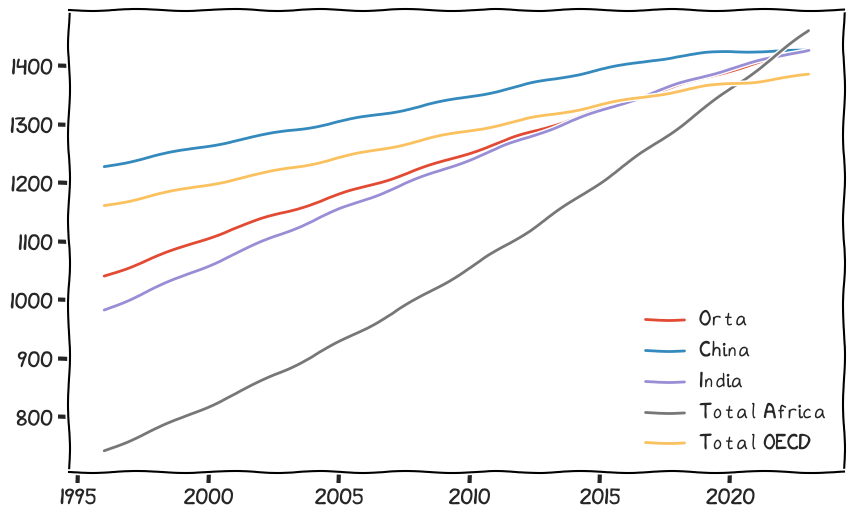

In [44]:
t=1
grafik=["Orta","China","India","Total Africa","Total OECD"]
labeller=["Orta","China","India","Total Africa","Total OECD"]
for i in grafik:
    plt.plot(dt[i,degiskenler[t]],label=i)
plt.legend()
print(degiskenler[t])